In [1]:
from simulation_bootstraping import *
import sys
import matplotlib.pyplot as plt

In [2]:
# set initial conditions
f_ic = linspace_circ(1000,1000,5)
s_ic = linspace_circ(25,25,5)

In [3]:
# set fish movement parameters in form (u,v,D)
# This specific setting corresponds to Resident and Choosy in the manuscript
f_params = [[0.05,0,0.05],[0.15,0,0.15]]
ratios = [0,0.5,1]

In [4]:
# run simulation for each population ratio
for i,ratio in enumerate(ratios):
    print(f"Run {i+1}/3")
    # set population counts
    fcs = [int(1000*ratio), 1000-int(1000*ratio)]
    save_dir = f"{os.getcwd()}/example_runs/r_{ratio}/"
    mp_run(f_params,fcs,f_ic,s_ic, save_dir, only_final= False)

Run 1/3
Run 2/3
Run 3/3


In [6]:
# helper function to load csv data files
def get_all(dir_to_get):
    out = []
    temp_dir_list = os.listdir(dir_to_get); dir_list = []
    for fi in temp_dir_list:
        if fi != "ic.csv": dir_list.append(fi)
    runs = np.sort([int(a[0:-4]) for a in dir_list])
    for run in runs:
        run_out = []
        with open(dir_to_get+f"{run}.csv") as f:
            reader = csv.reader(f)

            for v in reader:
                run_out.append([float(a) for a in v])
        out.append(run_out)
    return out

In [7]:
# load data
run_data = [get_all(f"{os.getcwd()}/example_runs/r_{ratio}/"
) for ratio in ratios]

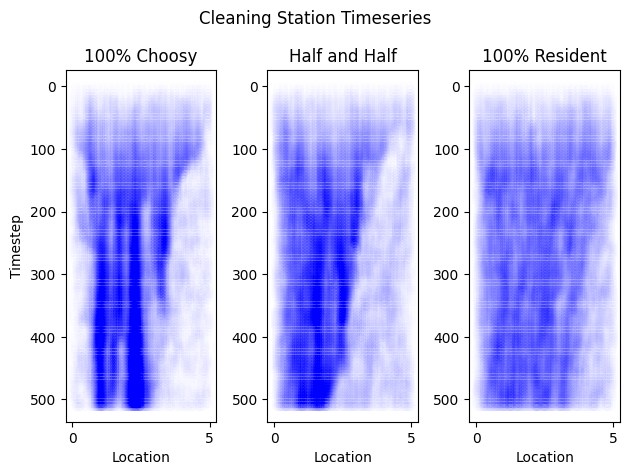

In [8]:
# plot timeseries
min_len = min(len(d) for d in run_data)
fig,ax = plt.subplots(1,3)
for i in range(0,min_len,5):
    for j in range(3):
        ax[j].scatter(run_data[j][i][0], np.zeros_like(run_data[j][i][0])+i,alpha=0.003,color="blue")
        ax[j].set_xticks([0,5])
        ax[j].set_xlabel("Location")
        ax[j].invert_yaxis()
        ax[j].set_title(["100% Choosy", "Half and Half", "100% Resident"][j])
ax[0].set_ylabel("Timestep")
fig.suptitle("Cleaning Station Timeseries")
fig.tight_layout()